In [1]:
# Step 1 : import library
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('candy-data.csv')
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
##dropping competitorname column
df = df.drop(['competitorname'], axis=1)

In [5]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [6]:
# Splitting data into training and testing sets

from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
## creating the dataframe for training and testing
train_df = training_set
test_df = testing_set

In [10]:
df.count()

chocolate           85
fruity              85
caramel             85
peanutyalmondy      85
nougat              85
crispedricewafer    85
hard                85
bar                 85
pluribus            85
sugarpercent        85
pricepercent        85
winpercent          85
dtype: int64

In [11]:
## defining x_train, y_train, x_test, y_test
X_train = train_df.drop(['chocolate'], axis=1)
y_train = train_df['chocolate']
X_test = test_df.drop(['chocolate'], axis=1)
y_test = test_df['chocolate']

In [12]:
##checking the shape of x_train, y_train, x_test, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(68, 11)
(68,)
(17, 11)
(17,)


In [13]:
df.shape

(85, 12)

In [15]:
##Data exploration
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

In [17]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(random_state=42)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)

In [27]:
##Evaluating the model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test, y_pred))


[[8 1]
 [1 7]]


<Axes: >

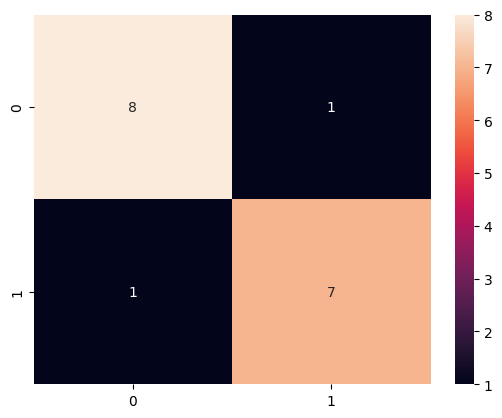

In [28]:
##visualizing the confusion matrix through heatmap
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [31]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8823529411764706
Precision: 0.875
Recall: 0.875
